# Project 2: Health Metrics Analysis

## Dataset
This project analyzes health metrics data, including patient records, treatments, outcomes, and demographics. The dataset used is the Heart Disease Dataset, which can be downloaded from Kaggle.

## Visualization Goals
1. **Analyze the distribution of various health metrics.**
2. **Identify correlations between different health parameters.**
3. **Visualize patient outcomes across different demographic groups.**

## Dataset Structure
- **age**: Age of the patient in years.
- **sex**: Gender of the patient (1 = male, 0 = female).
- **cp (Chest Pain type)**:
  - 0: Typical angina
  - 1: Atypical angina
  - 2: Non-anginal pain
  - 3: Asymptomatic
- **trestbps (Resting Blood Pressure)**: Resting blood pressure in mm Hg at the time of hospital admission.
- **chol (Serum Cholesterol)**: Serum cholesterol in mg/dl.
- **fbs (Fasting Blood Sugar)**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- **restecg (Resting Electrocardiographic Results)**:
  - 0: Normal
  - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.
- **thalach (Maximum Heart Rate Achieved)**: Maximum heart rate achieved during the test.
- **exang (Exercise Induced Angina)**: Exercise-induced angina (1 = yes, 0 = no).
- **oldpeak (ST Depression)**: ST depression induced by exercise relative to rest (value in millimeters).
- **slope (Slope of the Peak Exercise ST Segment)**:
  - 0: Upsloping
  - 1: Flat
  - 2: Downsloping
- **ca (Number of Major Vessels)**: Number of major vessels (0-3) colored by fluoroscopy.
- **thal (Thalassemia)**:
  - 1: Normal
  - 2: Fixed defect
  - 3: Reversible defect
- **target (Heart Disease Presence)**: Diagnosis of heart disease (1 = yes, 0 = no).

## Setup
To begin the analysis, we need to import the necessary libraries.

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for the plots
sns.set(style="whitegrid")


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:\\Users\\HP\\Downloads\\archive (10)\\heart.csv"
df = pd.read_csv(file_path)

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#check if there are any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


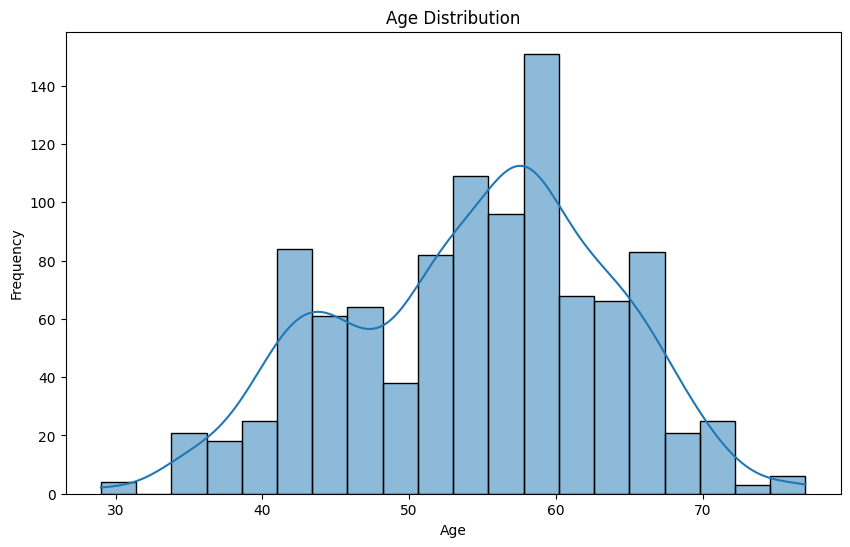

In [9]:
#plot the distribution of age 
plt.figure(figsize=(10,6))
sns.histplot(df["age"], bins=20 , kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


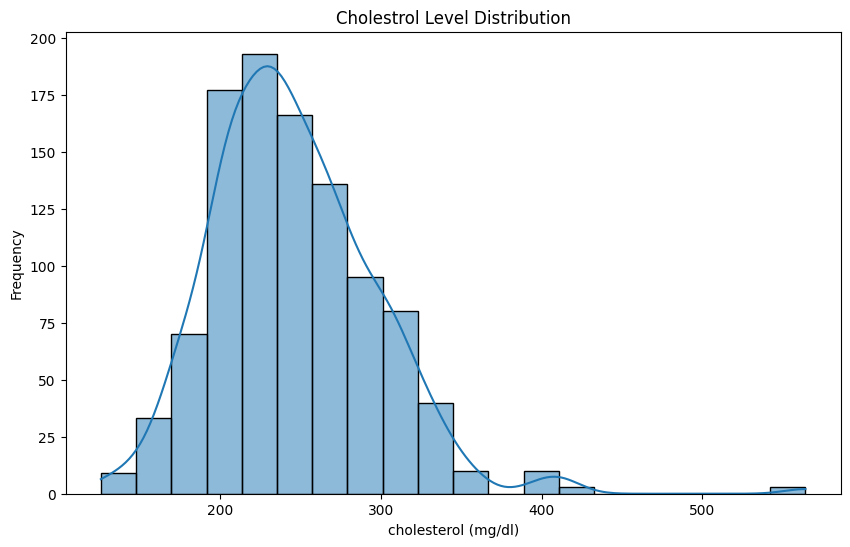

In [15]:
# Plot the distribution of cholesterol levels
plt.figure(figsize=(10,6))
sns.histplot(df["chol"], bins=20, kde=True)
plt.title("Cholestrol Level Distribution")
plt.xlabel("cholesterol (mg/dl)")
plt.ylabel("Frequency")
plt.show()

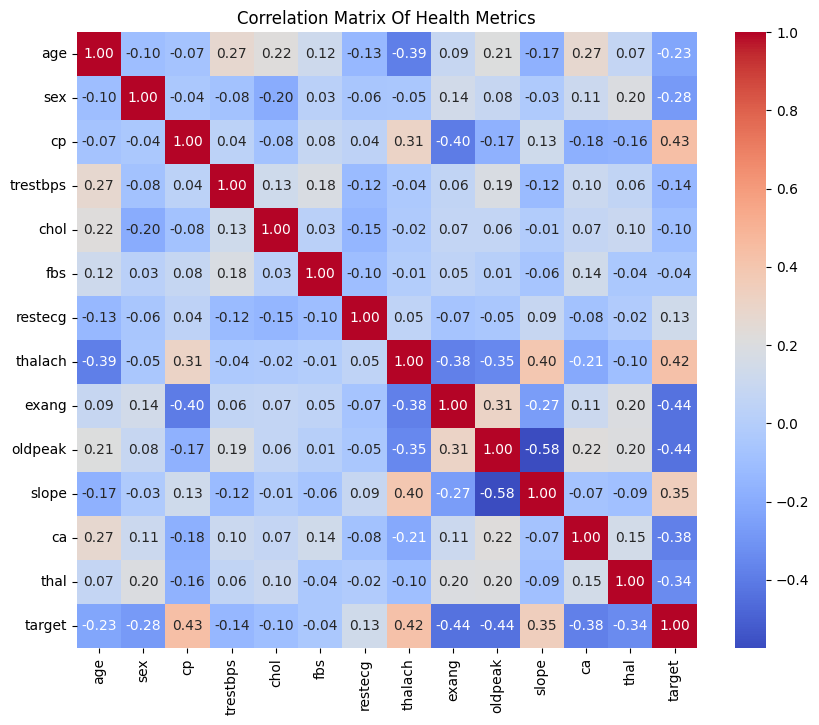

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

#Plot the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2F" )
plt.title("Correlation Matrix Of Health Metrics")
plt.show()

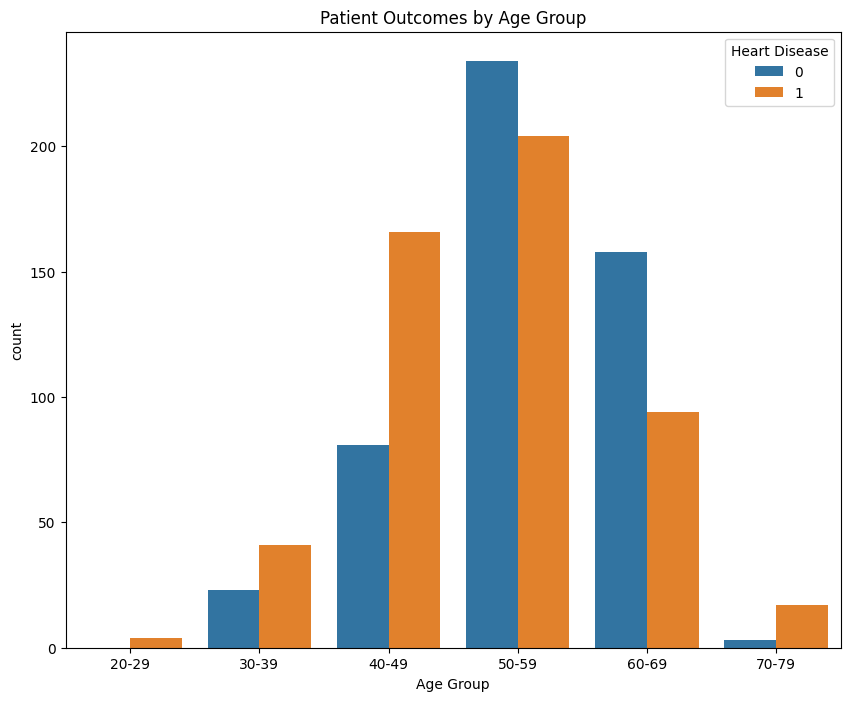

In [19]:
#categorize age into bins 
df["age_group"] = pd.cut(df["age"], bins=[20,30,40,50,60,70,80], labels=['20-29','30-39','40-49','50-59','60-69','70-79'])

#plot the patient outcome by age group
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="age_group", hue="target")
plt.title("Patient Outcomes by Age Group")
plt.xlabel("Age Group")
plt.ylabel("count")
plt.legend(title="Heart Disease")
plt.show()

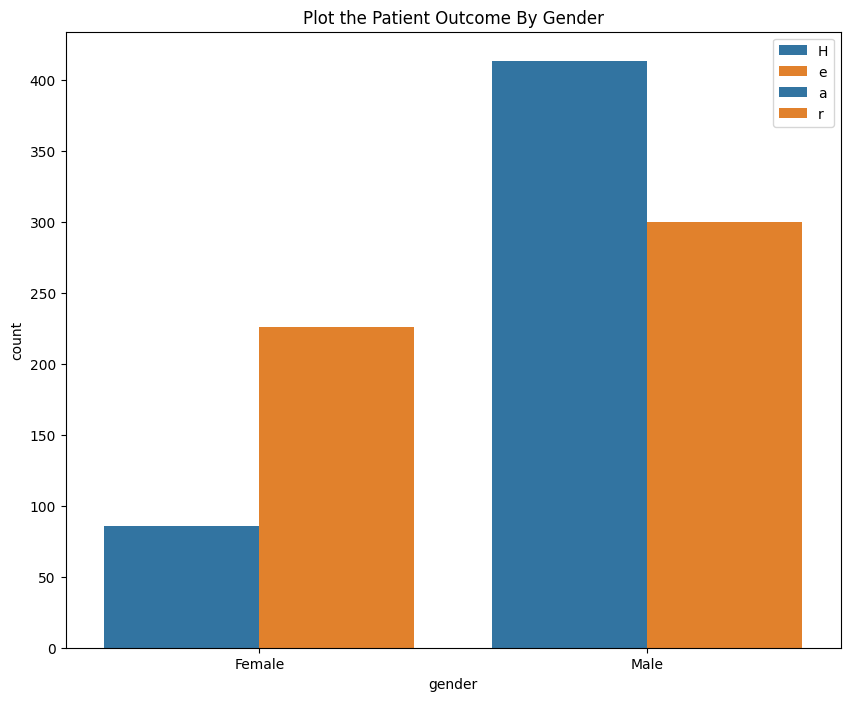

In [21]:
#plot the patient outcome by gender

plt.figure(figsize=(10,8))
sns.countplot(data=df, x="sex",hue="target")
plt.title("Plot the Patient Outcome By Gender")
plt.xlabel("gender")
plt.ylabel("count")
plt.xticks([0,1],['Female','Male'])
plt.legend("Heart Disease")
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


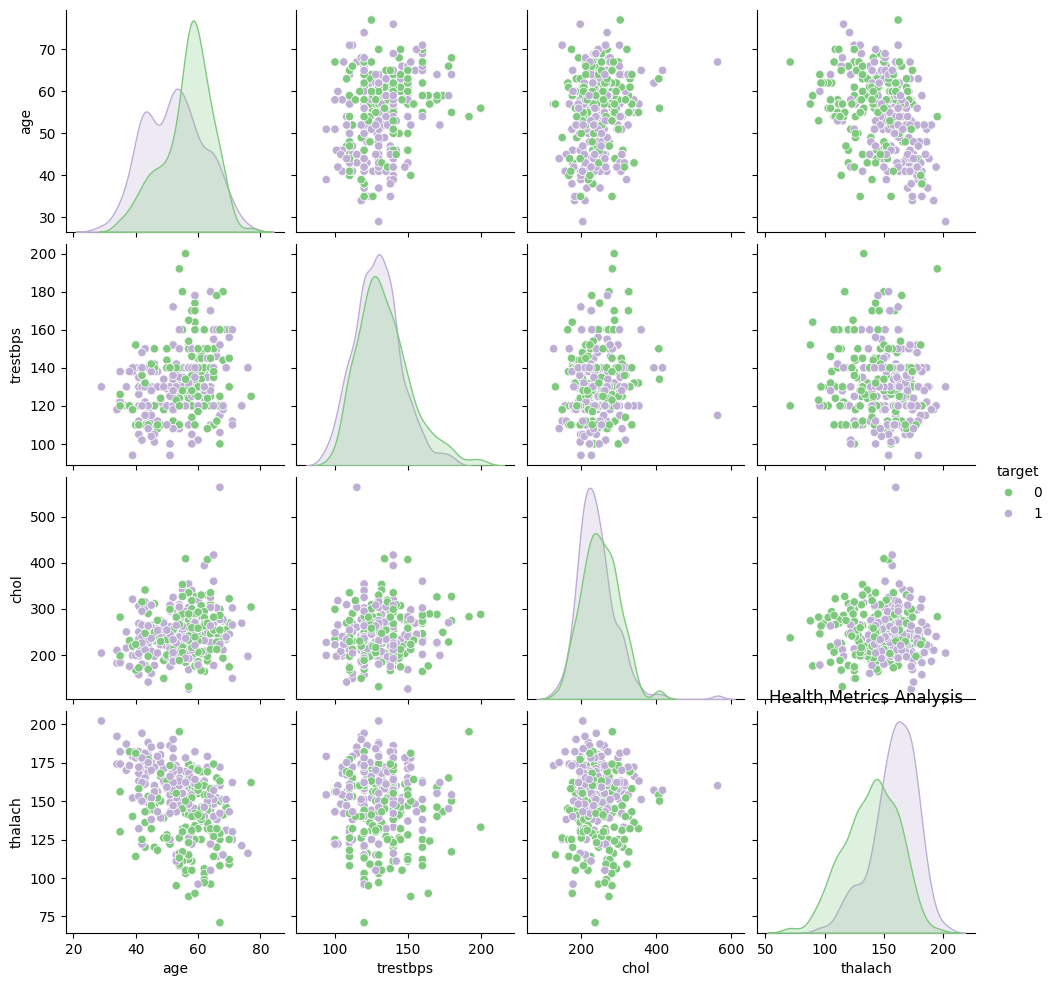

In [23]:
# Pair plot for health metrics
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='Accent')
plt.title('Health Metrics Analysis')
plt.show()

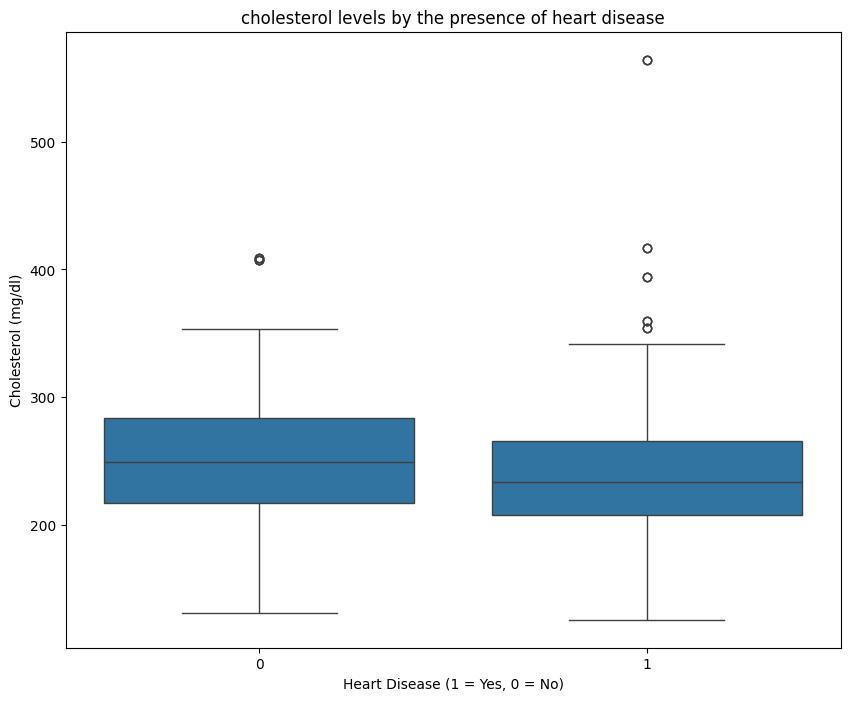

In [25]:
#Box plot of cholesterol levels by the presence of heart disease.
plt.figure(figsize=(10,8))
sns.boxplot(x="target" , y="chol" , data=df)
plt.title("cholesterol levels by the presence of heart disease")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()

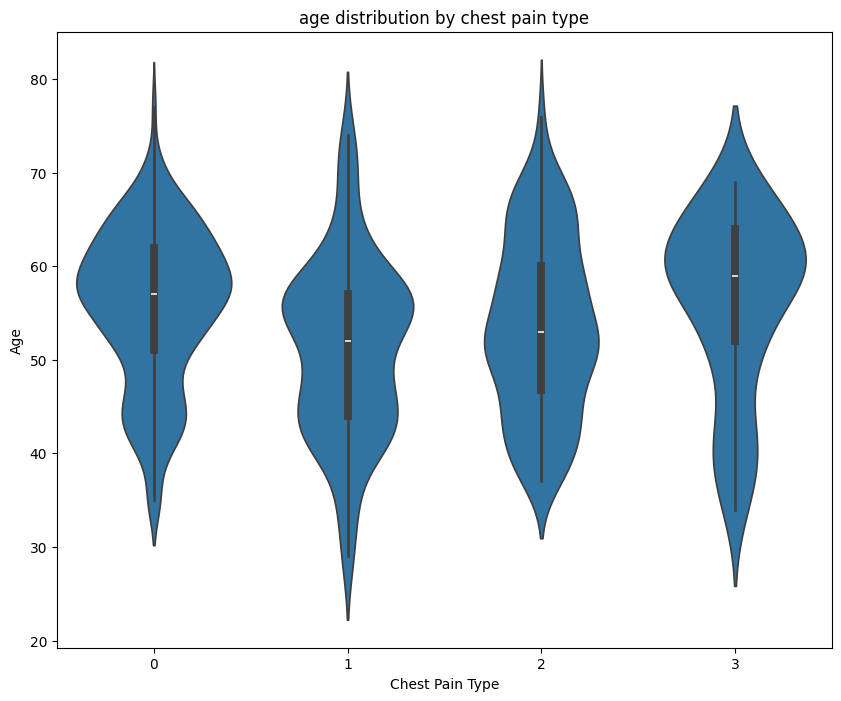

In [26]:
#Violin plot of age distribution by chest pain type
plt.figure(figsize=(10,8))
sns.violinplot(x="cp", y="age", data=df)
plt.title("age distribution by chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Age")
plt.show()

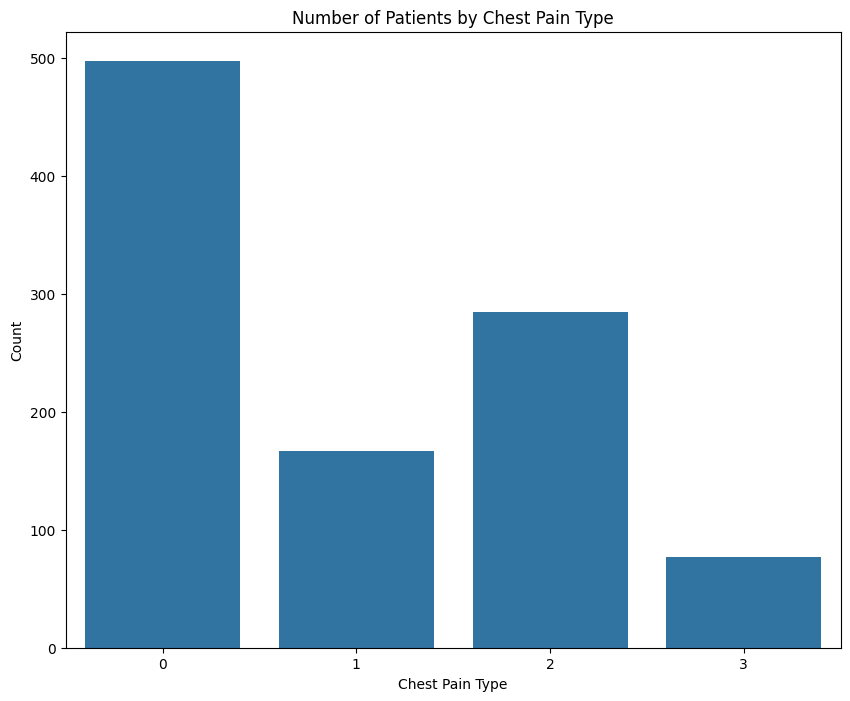

In [30]:
#Count plot of the number of patients by chest pain type.
plt.figure(figsize=(10,8))
sns.countplot(x="cp",data=df)
plt.title('Number of Patients by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

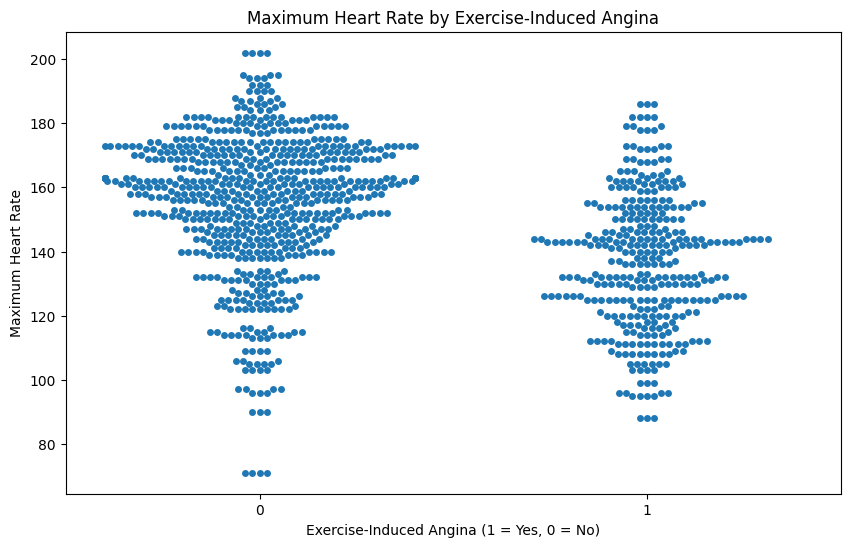

In [32]:
#Swarm plot of maximum heart rate achieved by exercise-induced angina

plt.figure(figsize=(10, 6))
sns.swarmplot(x='exang', y='thalach', data=df)
plt.title('Maximum Heart Rate by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Maximum Heart Rate')
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


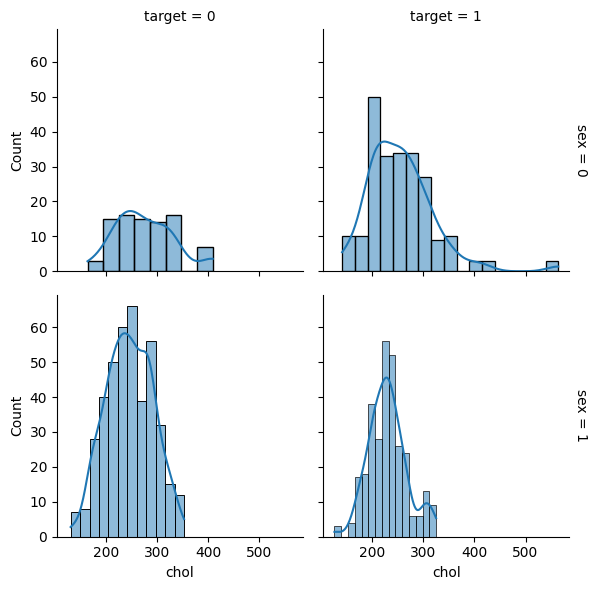

In [33]:
#Facet grid of cholesterol levels by age and presence of heart disease.
g = sns.FacetGrid(df, col="target", row="sex", margin_titles=True)
g.map(sns.histplot, "chol", kde=True)
g.add_legend()
plt.show()